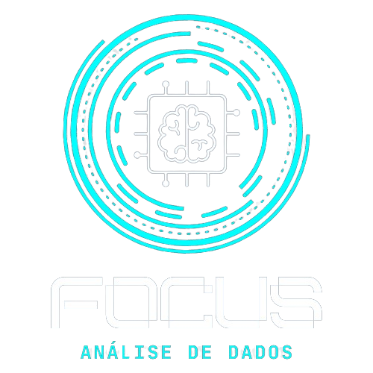
# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Crédito dos Clientes

Você foi contratado por um banco para conseguir definir o score de crédito dos clientes. Você precisa analisar todos os clientes do banco e, com base nessa análise, criar um modelo que consiga ler as informações do cliente e dizer automaticamente o score de crédito dele: Bom, Médio, Ruim.

In [ ]:
# Importar bibliotecas
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Importar base de dados
tabela = pd.read_csv('clientes.csv')

In [ ]:
# Visualizar base de dados
display(tabela)
display(tabela.info)

In [ ]:
# Preparar base de dados para a IA (transformar colunas de texto e números)
codificador = LabelEncoder()

tabela['profissao'] = codificador.fit_transform(tabela['profissao'])
tabela['mix_credito'] = codificador.fit_transform(tabela['mix_credito'])
tabela['comportamento_pagamento'] = codificador.fit_transform(tabela['comportamento_pagamento'])

display(tabela.info)

In [ ]:
# Dividir base de dados
# x = dados das colunas da tabela que você quer usar pra fazer a previsão (colunas úteis)
# y = dados que você quer prever (score de crédito)

x = tabela.drop(columns=['score_credito', 'id_cliente'])
y = tabela['score_credito']

In [ ]:
# Criar dados de treino (60-80%) e dados de teste (20-40%)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3) # testar 0.2 também

In [ ]:
# Criar modelos de IA (Árvore de Decisão e KNN Vizinhos Próximos)
modelo_arvore = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

modelo_arvore.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)

In [ ]:
# Criar as variáveis de previsão dos modelos
previsao_arvore = modelo_arvore.predict(x_teste)
previsao_knn = modelo_knn.predict(x_teste)

In [ ]:
# Testar os modelos (acurácia de cada um)
print(accuracy_score(y_teste, previsao_arvore))
print(accuracy_score(y_teste, previsao_knn))

In [ ]:
# Previsão com novos dados de clietes
tabela_nova = pd.read_csv('novos_clientes.csv')

tabela_nova['profissao'] = codificador.fit_transform(tabela_nova['profissao'])
tabela_nova['mix_credito'] = codificador.fit_transform(tabela_nova['mix_credito'])
tabela_nova['comportamento_pagamento'] = codificador.fit_transform(tabela_nova['comportamento_pagamento'])

previsoes = modelo_arvore.predict(tabela_nova)
display(previsoes)

In [ ]:
display(tabela_nova)